# Random Acts of Pizza

### ====================================================================================================

In [1]:
%cd \Users\user\Downloads\

/Users/user/Downloads


In [2]:
import pandas as pd
from sklearn import linear_model,tree, ensemble,decomposition,datasets,preprocessing, grid_search
import numpy as np
import pylab as pl
from sklearn.metrics import roc_curve, auc
from random import sample
%matplotlib inline

In [3]:
data = pd.read_json("train.json")
num_obs = len(data)
print 'Number of observations = ',num_obs

Number of observations =  4040


In [4]:
import datetime

In [5]:
print 'Received : True  = ' , len(data[data['requester_received_pizza'] == True])
print 'Received : False = ' , len(data[data['requester_received_pizza'] == False])
print 'Percentage of True = ',np.round((len(data[data['requester_received_pizza'] == True])/float(num_obs))*100,2),'%'

Received : True  =  994
Received : False =  3046
Percentage of True =  24.6 %


## Create Train, Cross validation and Test sets

In [9]:
#50-25-25 separation

num_train = int((num_obs) * 0.5)
num_crossval = int((num_obs) * 0.25)
num_test = num_obs - num_train - num_crossval
print 'Train            = ',num_train
print 'Cross validation = ',num_crossval
print 'Test             = ',num_test

Train            =  2020
Cross validation =  1010
Test             =  1010


### Random Sampling

#### Hold out sample for test set (this will be like the Leaderboard)

In [10]:
#create random index for the test set
rindex1 = np.array(sample(xrange(len(data)),num_test))

#This is the training set
test_df = data.ix[rindex1]

#### Training set and Cross validation set

In [11]:
#Left: ALL - num_test
data_minus_train = data.drop(rindex1).reset_index()

#create random index for the cross validation set
rindex2 = np.array(sample(xrange(len(data_minus_train)),num_train))

#This is the cross validation set
train_df = data_minus_train.ix[rindex2]

#This is the test set
train_df_cv = data_minus_train.drop(rindex2)

train_df=train_df.drop('index',axis=1)
train_df_cv=train_df_cv.drop('index',axis=1)

#### Compare the data in train,cross validation and test sets

In [12]:
print 'Received : True  = ' , len(data_minus_train[data_minus_train['requester_received_pizza'] == True])
print 'Received : False = ' , len(data_minus_train[data_minus_train['requester_received_pizza'] == False])
print 'Percentage of True = ',np.round((len(data_minus_train[data_minus_train['requester_received_pizza'] == True])/float(len(data_minus_train)))*100,2),'%'

Received : True  =  736
Received : False =  2294
Percentage of True =  24.29 %


In [13]:
print 'Received : True  = ' , len(test_df[test_df['requester_received_pizza'] == True])
print 'Received : False = ' , len(test_df[test_df['requester_received_pizza'] == False])
print 'Percentage of True = ',np.round((len(test_df[test_df['requester_received_pizza'] == True])/float(len(test_df)))*100,2),'%'

Received : True  =  258
Received : False =  752
Percentage of True =  25.54 %


In [14]:
training_set = data_minus_train
test_set = test_df 

In [15]:
print len(training_set) 
print len(test_set)

3030
1010


In [16]:
len(training_set[training_set['requester_received_pizza'] == True])/float(len(training_set))

0.2429042904290429

In [17]:
len(test_set[test_set['requester_received_pizza'] == True])/float(len(test_set))

0.25544554455445545

In [18]:
training_set['requester_id'] = training_set.index.map(lambda x: 'requester_' + str(x))

In [19]:
test_set = test_set.reset_index()

In [20]:
test_set = test_set.reset_index()

In [21]:
test_set['requester_id'] = test_set.level_0.map(lambda x: 'requester_' + str(x + 3030))

In [25]:
training = training_set[[
'requester_id',
'requester_received_pizza',
'giver_username_if_known',
'request_text_edit_aware',
 'request_title',
 'requester_account_age_in_days_at_request',
 'requester_days_since_first_post_on_raop_at_request',
 'requester_number_of_comments_at_request',
 'requester_number_of_comments_in_raop_at_request',
 'requester_number_of_posts_at_request',
 'requester_number_of_posts_on_raop_at_request',
'requester_number_of_subreddits_at_request',
 'requester_subreddits_at_request',
 'requester_upvotes_minus_downvotes_at_request',
'requester_upvotes_plus_downvotes_at_request',
 'unix_timestamp_of_request',
 'unix_timestamp_of_request_utc']]

In [30]:
import numpy as np
for i in np.sort(list(training.columns)):
    print i

giver_username_if_known
request_text_edit_aware
request_title
requester_account_age_in_days_at_request
requester_days_since_first_post_on_raop_at_request
requester_id
requester_number_of_comments_at_request
requester_number_of_comments_in_raop_at_request
requester_number_of_posts_at_request
requester_number_of_posts_on_raop_at_request
requester_number_of_subreddits_at_request
requester_received_pizza
requester_subreddits_at_request
requester_upvotes_minus_downvotes_at_request
requester_upvotes_plus_downvotes_at_request
unix_timestamp_of_request
unix_timestamp_of_request_utc


In [86]:
test = test_set[[
'requester_id',
'giver_username_if_known',
 'request_text_edit_aware',
 'request_title',
 'requester_account_age_in_days_at_request',
 'requester_days_since_first_post_on_raop_at_request',
 'requester_number_of_comments_at_request',
 'requester_number_of_comments_in_raop_at_request',
 'requester_number_of_posts_at_request',
 'requester_number_of_posts_on_raop_at_request',
 'requester_number_of_subreddits_at_request',
 'requester_subreddits_at_request',
 'requester_upvotes_minus_downvotes_at_request',
 'requester_upvotes_plus_downvotes_at_request',
 'unix_timestamp_of_request',
 'unix_timestamp_of_request_utc']]

In [72]:
test.head(2)

,requester_id,giver_username_if_known,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,requester_3030,N/A,Been sick for a few days and I'm starting to r...,[Request] Sick cannot get to the store for food.,52.108264,44.966481,7,1,5,0,5,"[Minecraft, RandomActsOfPizza, Random_Acts_Of_...",7,69,1321402735,1321402735
1,requester_3031,N/A,"So here I am, stuck at home on vacation. I hav...",[Request] Vacationing at home with no money,77.059815,0.000000,24,0,1,0,5,"[AskReddit, Magicdeckbuilding, fffffffuuuuuuuu...",173,267,1337801421,1337797821


In [73]:
test_answers.head(2)

,requester_id,requester_received_pizza,giver_username_if_known,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,requester_3030,False,N/A,Been sick for a few days and I'm starting to r...,[Request] Sick cannot get to the store for food.,52.108264,44.966481,7,1,5,0,5,"[Minecraft, RandomActsOfPizza, Random_Acts_Of_...",7,69,1321402735,1321402735
1,requester_3031,False,N/A,"So here I am, stuck at home on vacation. I hav...",[Request] Vacationing at home with no money,77.059815,0.000000,24,0,1,0,5,"[AskReddit, Magicdeckbuilding, fffffffuuuuuuuu...",173,267,1337801421,1337797821


In [74]:
print 'Received : True  = ' , len(train_df[train_df['requester_received_pizza'] == True])
print 'Received : False = ' , len(train_df[train_df['requester_received_pizza'] == False])
print 'Percentage of True = ',np.round((len(train_df[train_df['requester_received_pizza'] == True])/float(len(train_df)))*100,2),'%'

Received : True  =  511
Received : False =  1509
Percentage of True =  25.3 %


In [88]:
test_answers.to_json('test_answers.json')

In [6]:
test_answers = pd.read_json("test_answers.json")

In [8]:
test_answers_edit = test_answers[['requester_id','requester_received_pizza']]

In [10]:
#Export file
test_answers_edit.to_csv('SampleSubmission.csv',index=False)

In [11]:
test_answers_edit.head()

,requester_id,requester_received_pizza
0,requester_3030,False
1,requester_3031,False
10,requester_3040,False
100,requester_3130,False
1000,requester_4030,False


In [63]:
print 'Received : True  = ' , len(train_df_cv[train_df_cv['requester_received_pizza'] == True])
print 'Received : False = ' , len(train_df_cv[train_df_cv['requester_received_pizza'] == False])
print 'Percentage of True = ',np.round((len(train_df_cv[train_df_cv['requester_received_pizza'] == True])/float(len(train_df_cv)))*100,2),'%'

Received : True  =  232
Received : False =  778
Percentage of True =  22.97 %


In [65]:
print 'Received : True  = ' , len(data_minus_train[data_minus_train['requester_received_pizza'] == True])
print 'Received : False = ' , len(data_minus_train[data_minus_train['requester_received_pizza'] == False])
print 'Percentage of True = ',np.round((len(data_minus_train[data_minus_train['requester_received_pizza'] == True])/float(len(data_minus_train)))*100,2),'%'

Received : True  =  741
Received : False =  2289
Percentage of True =  24.46 %


In [64]:
print 'Received : True  = ' , len(test_df[test_df['requester_received_pizza'] == True])
print 'Received : False = ' , len(test_df[test_df['requester_received_pizza'] == False])
print 'Percentage of True = ',np.round((len(test_df[test_df['requester_received_pizza'] == True])/float(len(test_df)))*100,2),'%'

Received : True  =  253
Received : False =  757
Percentage of True =  25.05 %


In [54]:
train_df_set = set(train_df['request_id'].tolist())
train_df_cv_set = set(train_df_cv['request_id'].tolist())
test_df_set = set(test_df['request_id'].tolist())
print len(train_df_set),len(train_df_cv_set),len(test_df_set)
print 'Intersection of the sets should be empty = ',train_df_set & train_df_cv_set & test_df_set

2020 1010 1010
Intersection of the sets should be empty =  set([])


## Training Dataset

In [12]:
train_df.head(2)

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
646,N/A,3,3,0,t3_1kruz9,2,"I've got my story just like everyone, I would ...","I've got my story just like everyone, I would ...","[Request] Hey folks, I could use some pizza to...",1325.117581,...,True,"[AdviceAnimals, Art, AskCulinary, AskReddit, C...",2411,3822,4669,7686,shroom,SDAdam,1377051158,1377047558
1886,N/A,1,1,0,t3_lfmlt,0,me my mom and sister with 3 dogs and we got no...,me my mom and sister with 3 dogs and we got no...,[REQUEST] no food in the house at all,0.000000,...,False,[],0,0,0,2,None,Temari22,1318894326,1318890726


In [13]:
list(train_df.columns)

[u'giver_username_if_known',
 u'number_of_downvotes_of_request_at_retrieval',
 u'number_of_upvotes_of_request_at_retrieval',
 u'post_was_edited',
 u'request_id',
 u'request_number_of_comments_at_retrieval',
 u'request_text',
 u'request_text_edit_aware',
 u'request_title',
 u'requester_account_age_in_days_at_request',
 u'requester_account_age_in_days_at_retrieval',
 u'requester_days_since_first_post_on_raop_at_request',
 u'requester_days_since_first_post_on_raop_at_retrieval',
 u'requester_number_of_comments_at_request',
 u'requester_number_of_comments_at_retrieval',
 u'requester_number_of_comments_in_raop_at_request',
 u'requester_number_of_comments_in_raop_at_retrieval',
 u'requester_number_of_posts_at_request',
 u'requester_number_of_posts_at_retrieval',
 u'requester_number_of_posts_on_raop_at_request',
 u'requester_number_of_posts_on_raop_at_retrieval',
 u'requester_number_of_subreddits_at_request',
 u'requester_received_pizza',
 u'requester_subreddits_at_request',
 u'requester_upvo

In [14]:
print 'Number of variables in training dataset',len(train_df.columns)

Number of variables in training dataset 32


In [15]:
#Create new features
train_df['received'] = train_df.requester_received_pizza.map(lambda x: 0 if x == False else 1)
train_df['request_text_edit_aware_len'] = train_df.request_text_edit_aware.map(lambda x: len(x))
train_df['request_title_len'] = train_df.request_title.map(lambda x: len(x))

In [16]:
print 'Received : True  = ' , len(train_df.loc[train_df['received'] == 1])
print 'Received : False = ' , len(train_df.loc[train_df['received'] == 0])

Received : True  =  497
Received : False =  1523


In [17]:
#List columns that will be included in the model
variables = ['requester_account_age_in_days_at_request',
 'requester_days_since_first_post_on_raop_at_request',
 'requester_number_of_comments_at_request',
 'requester_number_of_comments_in_raop_at_request',
 'requester_number_of_posts_at_request',
 'requester_number_of_posts_on_raop_at_request',
 'requester_number_of_subreddits_at_request',
 'requester_upvotes_minus_downvotes_at_request',
 'requester_upvotes_plus_downvotes_at_request',
 'request_text_edit_aware_len',
 'request_title_len'
 ]

#### Fit Model

In [18]:
X_train = train_df[variables].values
Y_train = train_df['received'].values

In [19]:
Extratrees = ensemble.ExtraTreesRegressor(n_estimators = 50)
Extratrees.fit(X_train,Y_train)

ExtraTreesRegressor(bootstrap=False, compute_importances=None,
          criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
          min_samples_split=2, n_estimators=50, n_jobs=1, oob_score=False,
          random_state=None, verbose=0)

## CROSS VALIDATION DATASET

In [20]:
#Create new features
train_df_cv['received'] = train_df_cv.requester_received_pizza.map(lambda x: 0 if x == False else 1)
train_df_cv['request_text_edit_aware_len'] = train_df_cv.request_text_edit_aware.map(lambda x: len(x))
train_df_cv['request_title_len'] = train_df_cv.request_title.map(lambda x: len(x))

In [21]:
X_cv = train_df_cv[variables].values

#### Predict Cross Validation

In [22]:
Output_cv  = Extratrees.predict(X_cv)

In [23]:
Table1 = pd.DataFrame(Output_cv,columns=["Predicted"])
Table1["Actual"] = train_df_cv['received'].values

In [24]:
Table1.head()

,Predicted,Actual
0,0.14,0
1,0.62,0
2,0.30,0
3,0.14,0
4,0.32,1


In [25]:
print 'Actual',np.mean(Table1['Actual'])
print 'Predicted',np.mean(Table1['Predicted'])

Actual 0.238613861386
Predicted 0.264079207921


In [33]:
print 'True Positive  = ', len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 1)])
print 'False Positive = ', len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 0)])
print 'True Negative  = ', len(Table1[(Table1['Predicted'] < 0.5) & (Table1['Actual'] == 0)])
print 'False Negative = ', len(Table1[(Table1['Predicted'] < 0.5) & (Table1['Actual'] == 1)])
print ''
print 'True Positive Rate   = ', np.round((len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 1)])/float((len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 1)]) + len(Table1[(Table1['Predicted'] < 0.5) & (Table1['Actual'] == 1)]))) * 100),2),'%'
print 'False Positive Rate  = ', np.round((len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 0)])/float((len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 0)]) + len(Table1[(Table1['Predicted'] < 0.5) & (Table1['Actual'] == 0)]))) * 100),2),'%'
print 'True Negative Rate   = ', np.round((1-(len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 0)])/float((len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 0)]) + len(Table1[(Table1['Predicted'] < 0.5) & (Table1['Actual'] == 0)]))))) * 100,2),'%'
print 'False Negative Rate  = ', np.round((1-(len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 1)])/float((len(Table1[(Table1['Predicted'] >= 0.5) & (Table1['Actual'] == 1)]) + len(Table1[(Table1['Predicted'] < 0.5) & (Table1['Actual'] == 1)]))))) * 100,2),'%'

True Positive  =  43
False Positive =  72
True Negative  =  697
False Negative =  198

True Positive Rate   =  17.84 %
False Positive Rate  =  9.36 %
True Negative Rate   =  90.64 %
False Negative Rate  =  82.16 %


Area under the ROC curve : 0.631833


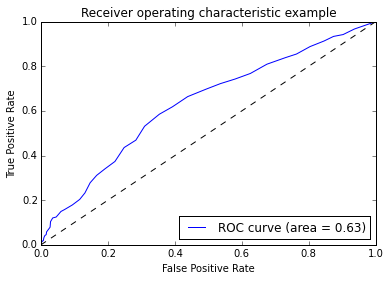

In [27]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Table1['Actual'],Table1['Predicted'])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

## Test Dataset

In [28]:
#Create new features
test_df['received'] = test_df.requester_received_pizza.map(lambda x: 0 if x == False else 1)
test_df['request_text_edit_aware_len'] = test_df.request_text_edit_aware.map(lambda x: len(x))
test_df['request_title_len'] = test_df.request_title.map(lambda x: len(x))

In [29]:
X_test = test_df[variables].values
Output_test  = Extratrees.predict(X_test)

In [30]:
Table2 = pd.DataFrame(Output_test,columns=["Predicted"])
Table2["Actual"] = test_df['received'].values

In [31]:
Table2.head()

,Predicted,Actual
0,0.32,0
1,0.22,0
2,0.06,0
3,0.10,0
4,0.24,1


Area under the ROC curve : 0.609284


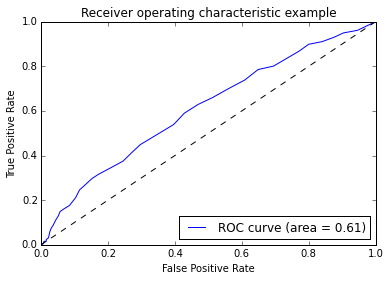

In [32]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Table2['Actual'],Table2['Predicted'])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()